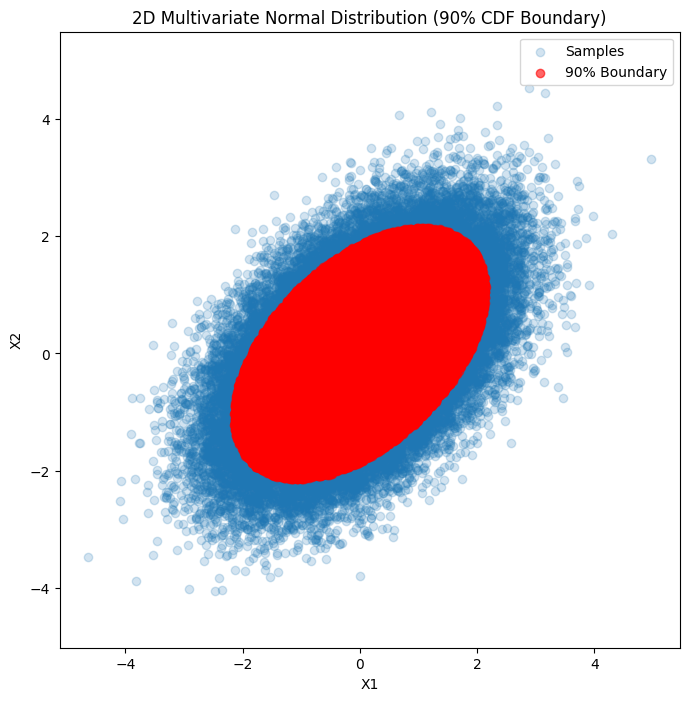

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, multivariate_normal

# 다변량 정규분포 매개변수
mu = np.array([0, 0])  # 평균
Sigma = np.array([[1, 0.5], [0.5, 1]])  # 공분산 행렬

# 샘플링
N = 100000  # 샘플 크기
samples = np.random.multivariate_normal(mu, Sigma, N)

# 마할라노비스 거리 계산
inv_Sigma = np.linalg.inv(Sigma)
distances = np.array([np.dot((x - mu).T, np.dot(inv_Sigma, (x - mu))) for x in samples])

# Chi-squared 분포 임계값 (90% CDF)
critical_value = chi2.ppf(0.9, df=2)

# 경계 추출
boundary_samples = samples[distances <= critical_value]

# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2, label='Samples')
plt.scatter(boundary_samples[:, 0], boundary_samples[:, 1], color='red', alpha=0.6, label='90% Boundary')
plt.title("2D Multivariate Normal Distribution (90% CDF Boundary)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()


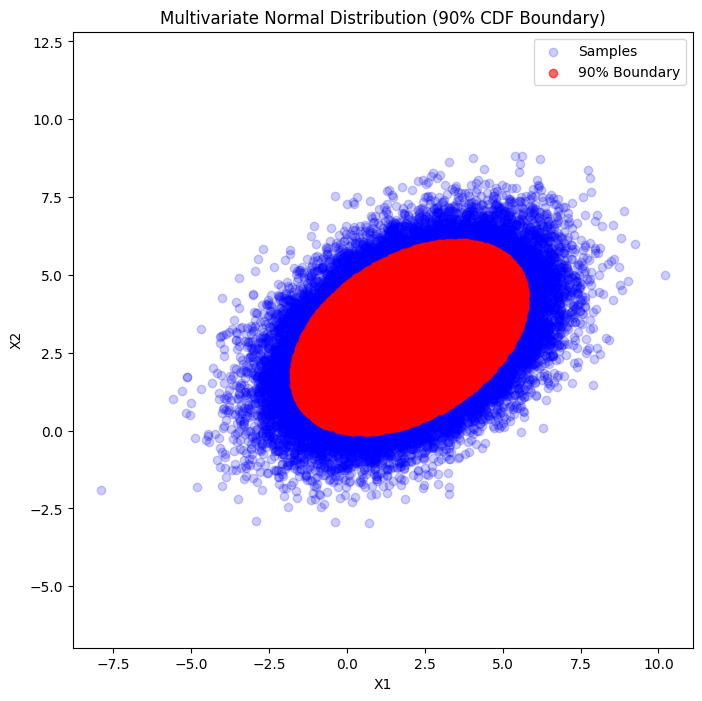

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, multivariate_normal

# 1. 다변량 정규분포 매개변수
mu = np.array([2, 3])  # 평균: 중심이 아님
Sigma = np.array([[3, 1], [1, 2]])  # 공분산 행렬: 대칭, 양의 정부호

# 2. 샘플링
N = 100000  # 샘플 수
samples = np.random.multivariate_normal(mu, Sigma, N)

# 3. 마할라노비스 거리 계산
inv_Sigma = np.linalg.inv(Sigma)
distances = np.array([np.dot((x - mu).T, np.dot(inv_Sigma, (x - mu))) for x in samples])

# 4. Chi-squared 분포 임계값 (90% CDF)
critical_value = chi2.ppf(0.9, df=2)

# 5. 경계 추출
boundary_samples = samples[distances <= critical_value]

# 6. 시각화
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2, label='Samples', color='blue')
plt.scatter(boundary_samples[:, 0], boundary_samples[:, 1], color='red', alpha=0.6, label='90% Boundary')
plt.title("Multivariate Normal Distribution (90% CDF Boundary)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()


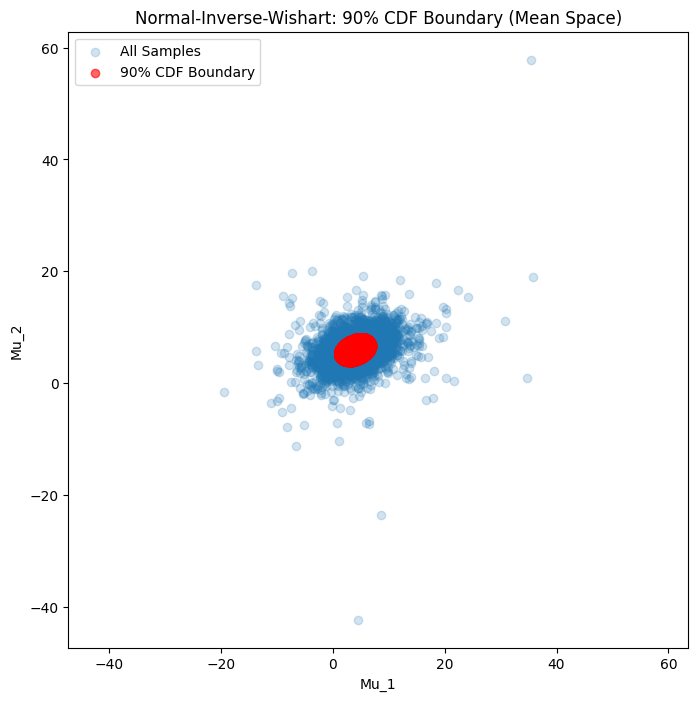

In [6]:
import numpy as np
from scipy.stats import invwishart, multivariate_normal

# 1. Normal-Inverse-Wishart 분포의 매개변수 설정
mu0 = np.array([4, 6])  # 평균 벡터의 사전 평균
kappa0 = 1.2            # 평균 벡터의 사전 정확도
Psi = np.array([[2, 0.5], [0.5, 1]])  # 스케일 행렬
nu = 4                  # 자유도 (nu > k-1, 여기서는 k=2)

# 2. 샘플링
N = 100000  # 샘플 수
samples_mu = []
samples_Sigma = []

for _ in range(N):
    # 공분산 행렬 샘플링 (Inverse Wishart)
    Sigma = invwishart.rvs(df=nu, scale=Psi)
    # 평균 벡터 샘플링 (Multivariate Normal)
    mu = multivariate_normal.rvs(mean=mu0, cov=Sigma / kappa0)
    samples_mu.append(mu)
    samples_Sigma.append(Sigma)

samples_mu = np.array(samples_mu)
samples_Sigma = np.array(samples_Sigma)

# 3. 마할라노비스 거리 기반 경계 계산
# 기준점을 평균으로 설정
mean_mu = np.mean(samples_mu, axis=0)
mean_Sigma = np.mean(samples_Sigma, axis=0)

inv_mean_Sigma = np.linalg.inv(mean_Sigma)
mahalanobis_distances = [
    (mu - mean_mu).T @ inv_mean_Sigma @ (mu - mean_mu)
    for mu in samples_mu
]

# Chi-squared 임계값 (90% CDF, 자유도 2)
from scipy.stats import chi2
critical_value = chi2.ppf(0.9, df=2)

# 4. 90% CDF 경계에 해당하는 샘플 추출
boundary_mu = samples_mu[np.array(mahalanobis_distances) <= critical_value]

# 5. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(samples_mu[:, 0], samples_mu[:, 1], alpha=0.2, label="All Samples")
plt.scatter(boundary_mu[:, 0], boundary_mu[:, 1], color="red", alpha=0.6, label="90% CDF Boundary")
plt.title("Normal-Inverse-Wishart: 90% CDF Boundary (Mean Space)")
plt.xlabel("Mu_1")
plt.ylabel("Mu_2")
plt.legend()
plt.axis("equal")
plt.show()


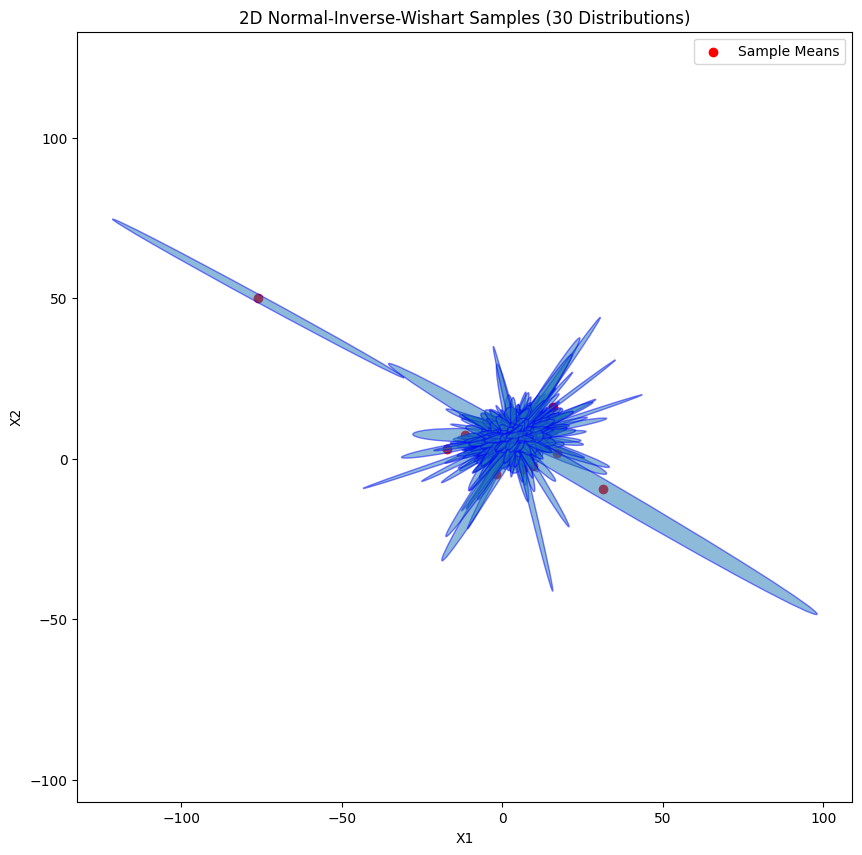

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invwishart, multivariate_normal

# 1. Normal-Inverse-Wishart 분포의 매개변수 설정
mu0 = np.array([4, 7])  # 평균 벡터의 사전 평균
kappa0 = 1.2            # 평균 벡터의 사전 정확도
Psi = np.array([[2, 0.5], [0.5, 1]])  # 스케일 행렬
nu = 4                  # 자유도 (nu > k-1, 여기서는 k=2)

# 2. 샘플링 (30개의 샘플)
N = 10000  # 샘플 수
samples_mu = []
samples_Sigma = []

for _ in range(N):
    # 공분산 행렬 샘플링 (Inverse Wishart)
    Sigma = invwishart.rvs(df=nu, scale=Psi)
    # 평균 벡터 샘플링 (Multivariate Normal)
    mu = multivariate_normal.rvs(mean=mu0, cov=Sigma / kappa0)
    samples_mu.append(mu)
    samples_Sigma.append(Sigma)

samples_mu = np.array(samples_mu)
samples_Sigma = np.array(samples_Sigma)

# 3. 2D 정규분포 타원 그리기 함수
def plot_cov_ellipse(cov, pos, ax=None, nstd=2.0, **kwargs):
    """
    Plots an ellipse representing the covariance matrix `cov` centered at `pos`.
    """
    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(vals)
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_patch(ellipse)
    return ax

# 4. 플롯 생성
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.scatter(samples_mu[:, 0], samples_mu[:, 1], c='red', label='Sample Means')

for i in range(N):
    plot_cov_ellipse(samples_Sigma[i], samples_mu[i], ax=ax, edgecolor='blue', alpha=0.5)

plt.title("2D Normal-Inverse-Wishart Samples (30 Distributions)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()
plt.show()


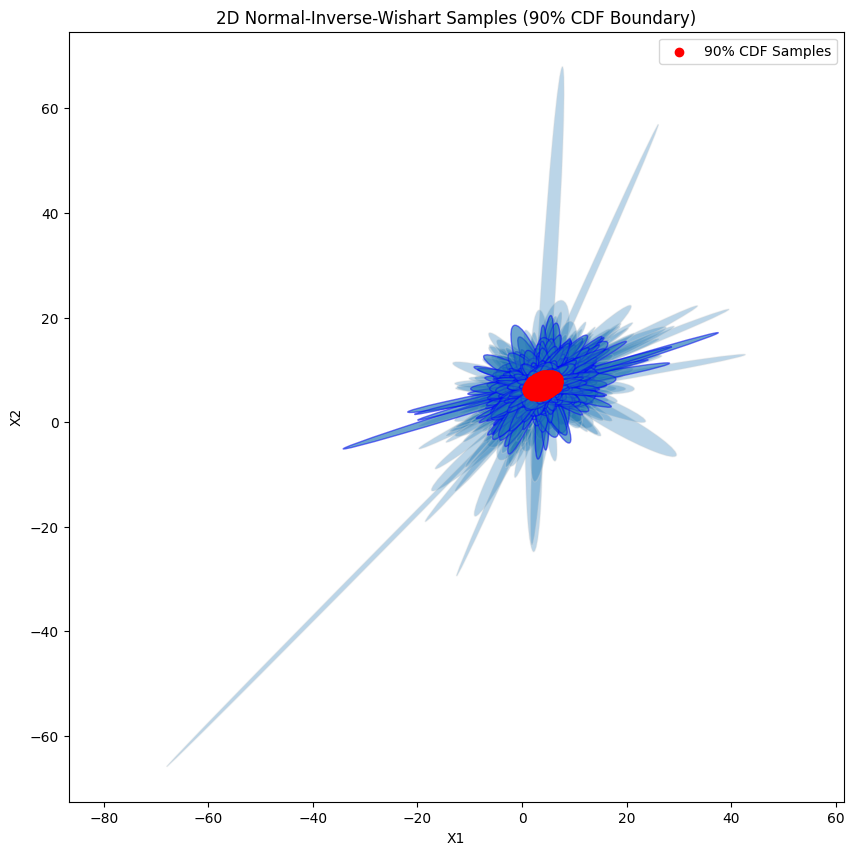

In [11]:
from scipy.stats import chi2

# 1. 마할라노비스 거리 계산 (모든 샘플의 중심에서)
inv_Psi = np.linalg.inv(Psi)
mahalanobis_distances = [
    (mu - mu0).T @ inv_Psi @ (mu - mu0) for mu in samples_mu
]

# 2. Chi-squared 임계값 (90% CDF, 자유도 2)
critical_value = chi2.ppf(0.9, df=2)

# 3. 90% CDF 내부에 있는 샘플 선택
inside_indices = [i for i, d in enumerate(mahalanobis_distances) if d <= critical_value]

# 4. 플롯 생성 (90% CDF 내부 샘플만 표시)
plt.figure(figsize=(10, 10))
ax = plt.gca()

# 모든 샘플 (배경)
for i in range(N):
    plot_cov_ellipse(samples_Sigma[i], samples_mu[i], ax=ax, edgecolor='lightgray', alpha=0.3)

# 90% CDF 내부 샘플
for i in inside_indices:
    plot_cov_ellipse(samples_Sigma[i], samples_mu[i], ax=ax, edgecolor='blue', alpha=0.5)
ax.scatter(samples_mu[inside_indices, 0], samples_mu[inside_indices, 1], c='red', label='90% CDF Samples')

plt.title("2D Normal-Inverse-Wishart Samples (90% CDF Boundary)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()
plt.show()


In [12]:
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# 함수 정의: 다변량 정규분포 시각화
def plot_multivariate_normal(a, b, theta):
    # 공분산 행렬 계산
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
    covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

    # 다변량 정규분포의 평균
    mean = [0, 0]

    # 그리드 생성
    x = np.linspace(-5, 5, 500)
    y = np.linspace(-5, 5, 500)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # 다변량 정규분포 계산
    rv = multivariate_normal(mean, covariance_matrix)
    Z = rv.pdf(pos)

    # 등고선 그리기
    plt.figure(figsize=(8, 8))
    plt.contour(X, Y, Z, levels=10, linewidths=1.5, cmap='viridis')
    plt.title("2D Multivariate Normal Distribution")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Jupyter Lab 슬라이드바 생성
interact(
    plot_multivariate_normal,
    a=FloatSlider(min=1, max=5, step=0.1, value=3, description='Major Axis (a)'),
    b=FloatSlider(min=1, max=5, step=0.1, value=2, description='Minor Axis (b)'),
    theta=FloatSlider(min=0, max=np.pi, step=0.01, value=np.pi/4, description='Rotation (θ)'),
);


interactive(children=(FloatSlider(value=3.0, description='Major Axis (a)', max=5.0, min=1.0), FloatSlider(valu…

In [ ]:
import numpy as np

def decompose_covariance(cov_matrix):
    # 고유값 분해
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # 고유값을 정렬 (큰 값을 첫 번째로)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # 주축과 보조축 길이
    a = 2 * np.sqrt(eigenvalues[0])  # 주축 길이
    b = 2 * np.sqrt(eigenvalues[1])  # 보조축 길이
    
    # 기울기 계산
    v1 = eigenvectors[:, 0]
    theta = np.arctan2(v1[1], v1[0])
    
    return a, b, theta

# 예제 공분산 행렬
cov_matrix = np.array([[4, 2],
                       [2, 3]])

# 분해 실행
a, b, theta = decompose_covariance(cov_matrix)
print(f"주축 길이 (a): {a}")
print(f"보조축 길이 (b): {b}")
print(f"기울기 (theta): {np.degrees(theta)}°")


주축 길이 (a): 4.716588942364527
보조축 길이 (b): 2.3987056402911717
기울기 (theta): -142.01812173396323°


In [83]:
a, b, c = decompose_covariance([[2, 0.5], [0.5, 1]])
3.14 + c

0.39110642810893115

In [38]:
def batch_decompose_covariances(cov_matrices):
    """
    여러 공분산 행렬을 numpy batch 연산으로 분해하여 주축 길이, 보조축 길이, 기울기를 반환하는 함수.
    
    Parameters:
        cov_matrices (np.ndarray): (N, 2, 2) 형태의 numpy 배열. N개의 2x2 공분산 행렬.
    
    Returns:
        pd.DataFrame: 각 공분산 행렬에 대한 주축 길이, 보조축 길이, 기울기를 포함한 데이터프레임.
    """
    # 고유값 및 고유벡터 계산 (batch 연산)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrices)
    
    # 고유값 정렬 (큰 값이 첫 번째)
    idx = np.argsort(eigenvalues, axis=1)[:, ::-1]
    eigenvalues_sorted = np.take_along_axis(eigenvalues, idx, axis=1)
    eigenvectors_sorted = np.take_along_axis(
        eigenvectors, idx[:, :, None], axis=1
    )  # 정렬된 고유벡터
    
    # 주축과 보조축 길이 계산
    a = 2 * np.sqrt(eigenvalues_sorted[:, 0])  # 주축 길이
    b = 2 * np.sqrt(eigenvalues_sorted[:, 1])  # 보조축 길이
    
    # 기울기 계산 (첫 번째 고유벡터 사용)
    v1 = eigenvectors_sorted[:, :, 0]
    theta = np.arctan2(v1[:, 1], v1[:, 0])  # 라디안 단위
    
    # 결과를 데이터프레임으로 정리
    results = {
        "Covariance Index": np.arange(1, cov_matrices.shape[0] + 1),
        "Major Axis (a)": a,
        "Minor Axis (b)": b,
        "Rotation (θ, rad)": theta,
        "Rotation (θ, deg)": np.degrees(theta),
    }
    
    return pd.DataFrame(results)

# 예제 공분산 행렬들 (numpy 배열로)
cov_matrices = np.array([
    [[4, 2],
     [2, 3]],
    [[1, 0.5],
     [0.5, 2]],
    [[9, -3],
     [-3, 4]]
])

# 함수 실행
res = batch_decompose_covariances(samples_Sigma)
# 결과 출력
# import ace_tools as tools; tools.display_dataframe_to_user(name="Batch Decomposed Covariances", dataframe=batch_results)


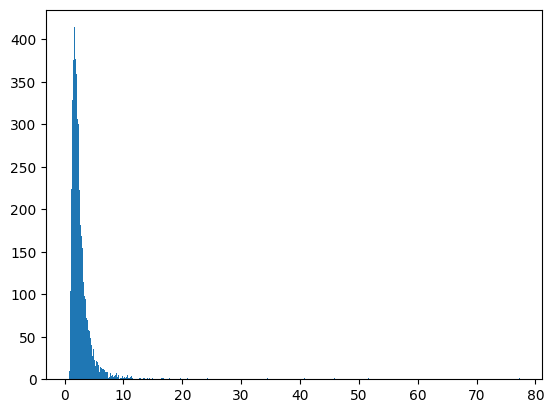

In [49]:
plt.hist(res['Major Axis (a)'], bins=1000)
plt.show()

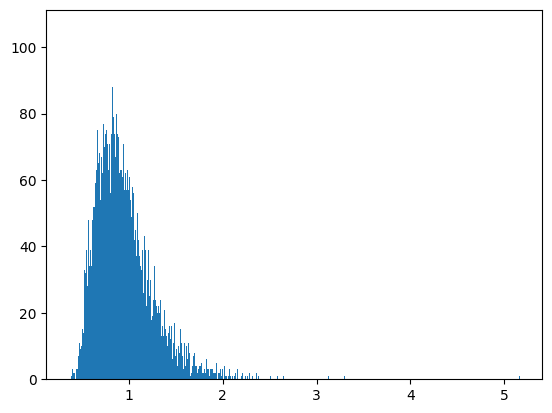

In [50]:
plt.hist(res['Minor Axis (b)'], bins=1000)
plt.show()

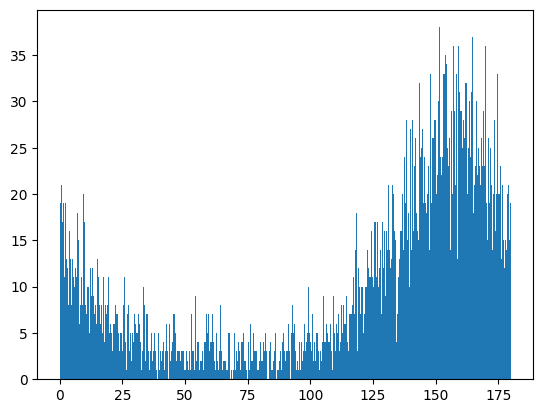

In [71]:
plt.hist([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
plt.show()

In [84]:
theta = 0
a = 10
b = 3
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

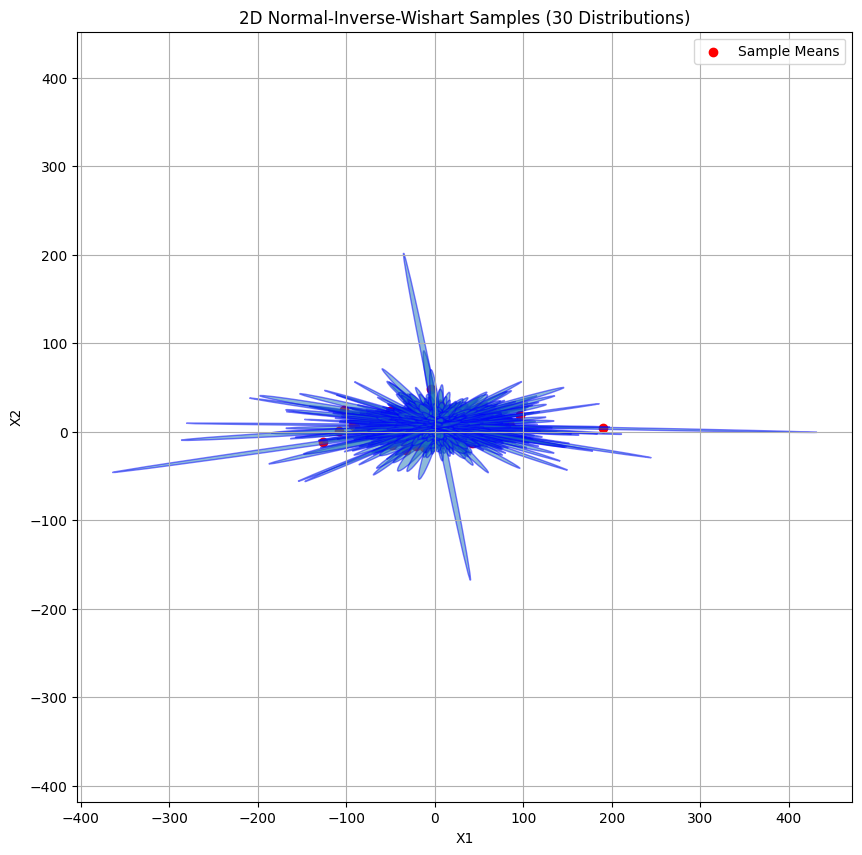

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invwishart, multivariate_normal

# 1. Normal-Inverse-Wishart 분포의 매개변수 설정
mu0 = np.array([4, 7])  # 평균 벡터의 사전 평균
kappa0 = 1.2            # 평균 벡터의 사전 정확도
Psi = np.array(covariance_matrix)  # 스케일 행렬
nu = 4                  # 자유도 (nu > k-1, 여기서는 k=2)

# 2. 샘플링 (30개의 샘플)
N = 100000  # 샘플 수
samples_mu = []
samples_Sigma = []

for _ in range(N):
    # 공분산 행렬 샘플링 (Inverse Wishart)
    Sigma = invwishart.rvs(df=nu, scale=Psi)
    # 평균 벡터 샘플링 (Multivariate Normal)
    mu = multivariate_normal.rvs(mean=mu0, cov=Sigma / kappa0)
    samples_mu.append(mu)
    samples_Sigma.append(Sigma)

samples_mu = np.array(samples_mu)
samples_Sigma = np.array(samples_Sigma)

# 3. 2D 정규분포 타원 그리기 함수
def plot_cov_ellipse(cov, pos, ax=None, nstd=2.0, **kwargs):
    """
    Plots an ellipse representing the covariance matrix `cov` centered at `pos`.
    """
    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(vals)
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_patch(ellipse)
    return ax

# 4. 플롯 생성
plt.figure(figsize=(10, 10))
plt.grid(True)

ax = plt.gca()
ax.scatter(samples_mu[:, 0], samples_mu[:, 1], c='red', label='Sample Means')

for i in range(N):
    plot_cov_ellipse(samples_Sigma[i], samples_mu[i], ax=ax, edgecolor='blue', alpha=0.5)

plt.title("2D Normal-Inverse-Wishart Samples (30 Distributions)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()
plt.show()


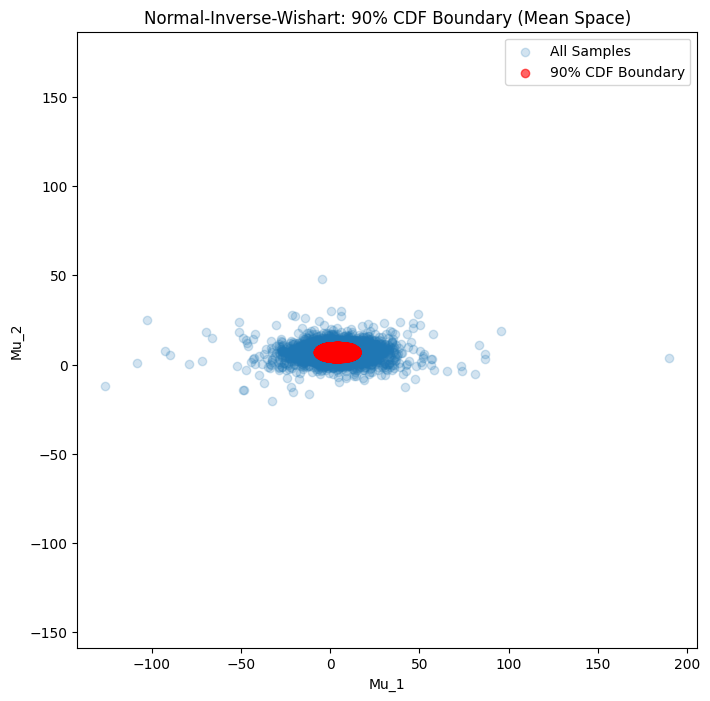

In [101]:
# 3. 마할라노비스 거리 기반 경계 계산
# 기준점을 평균으로 설정
mean_mu = np.mean(samples_mu, axis=0)
mean_Sigma = np.mean(samples_Sigma, axis=0)

inv_mean_Sigma = np.linalg.inv(mean_Sigma)
mahalanobis_distances = [
    (mu - mean_mu).T @ inv_mean_Sigma @ (mu - mean_mu)
    for mu in samples_mu
]

# Chi-squared 임계값 (90% CDF, 자유도 2)
from scipy.stats import chi2
critical_value = chi2.ppf(0.9, df=2)

# 4. 90% CDF 경계에 해당하는 샘플 추출
boundary_mu = samples_mu[np.array(mahalanobis_distances) <= critical_value]

plt.figure(figsize=(8, 8))
plt.scatter(samples_mu[:, 0], samples_mu[:, 1], alpha=0.2, label="All Samples")
plt.scatter(boundary_mu[:, 0], boundary_mu[:, 1], color="red", alpha=0.6, label="90% CDF Boundary")
plt.title("Normal-Inverse-Wishart: 90% CDF Boundary (Mean Space)")
plt.xlabel("Mu_1")
plt.ylabel("Mu_2")
plt.legend()
plt.axis("equal")
plt.show()

In [107]:
theta = 0
a = 10
b = 3
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

batch_decompose_covariances(np.array([covariance_matrix / 7]))

,Covariance Index,Major Axis (a),Minor Axis (b),"Rotation (θ, rad)","Rotation (θ, deg)"
0,1,3.779645,1.133893,0.0,0.0


In [88]:
def batch_decompose_covariances(cov_matrices):
    """
    여러 공분산 행렬을 numpy batch 연산으로 분해하여 주축 길이, 보조축 길이, 기울기를 반환하는 함수.
    
    Parameters:
        cov_matrices (np.ndarray): (N, 2, 2) 형태의 numpy 배열. N개의 2x2 공분산 행렬.
    
    Returns:
        pd.DataFrame: 각 공분산 행렬에 대한 주축 길이, 보조축 길이, 기울기를 포함한 데이터프레임.
    """
    # 고유값 및 고유벡터 계산 (batch 연산)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrices)
    
    # 고유값 정렬 (큰 값이 첫 번째)
    idx = np.argsort(eigenvalues, axis=1)[:, ::-1]
    eigenvalues_sorted = np.take_along_axis(eigenvalues, idx, axis=1)
    eigenvectors_sorted = np.take_along_axis(
        eigenvectors, idx[:, :, None], axis=1
    )  # 정렬된 고유벡터
    
    # 주축과 보조축 길이 계산
    a = 2 * np.sqrt(eigenvalues_sorted[:, 0])  # 주축 길이
    b = 2 * np.sqrt(eigenvalues_sorted[:, 1])  # 보조축 길이
    
    # 기울기 계산 (첫 번째 고유벡터 사용)
    v1 = eigenvectors_sorted[:, :, 0]
    theta = np.arctan2(v1[:, 1], v1[:, 0])  # 라디안 단위
    
    # 결과를 데이터프레임으로 정리
    results = {
        "Covariance Index": np.arange(1, cov_matrices.shape[0] + 1),
        "Major Axis (a)": a,
        "Minor Axis (b)": b,
        "Rotation (θ, rad)": theta,
        "Rotation (θ, deg)": np.degrees(theta),
    }
    
    return pd.DataFrame(results)

# 예제 공분산 행렬들 (numpy 배열로)
cov_matrices = np.array([
    [[4, 2],
     [2, 3]],
    [[1, 0.5],
     [0.5, 2]],
    [[9, -3],
     [-3, 4]]
])

# 함수 실행
res = batch_decompose_covariances(samples_Sigma)
# 결과 출력
# import ace_tools as tools; tools.display_dataframe_to_user(name="Batch Decomposed Covariances", dataframe=batch_results)


4.913261311506602
1.239720787036593
0.27003665400875665


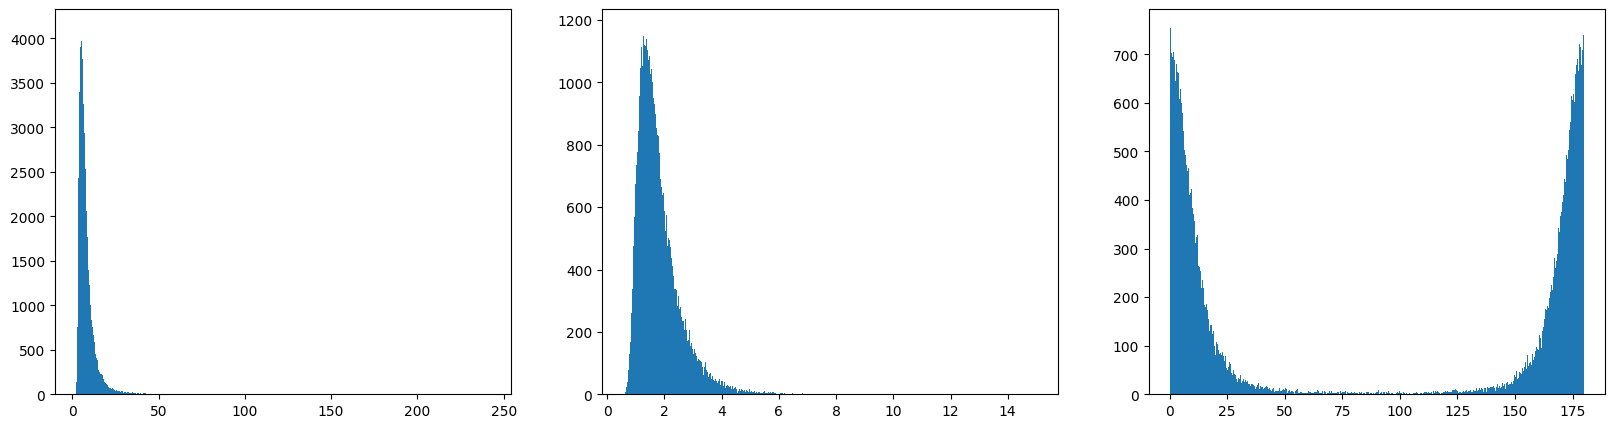

In [99]:
fig, ax = plt.subplots(1,3, figsize=(20,5))


hist, bin_edges = np.histogram(res['Major Axis (a)'], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
hist, bin_edges = np.histogram(res['Minor Axis (b)'], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
hist, bin_edges = np.histogram([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
ax[0].hist(res['Major Axis (a)'], bins=1000)
ax[1].hist(res['Minor Axis (b)'], bins=1000)
ax[2].hist([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
plt.show()

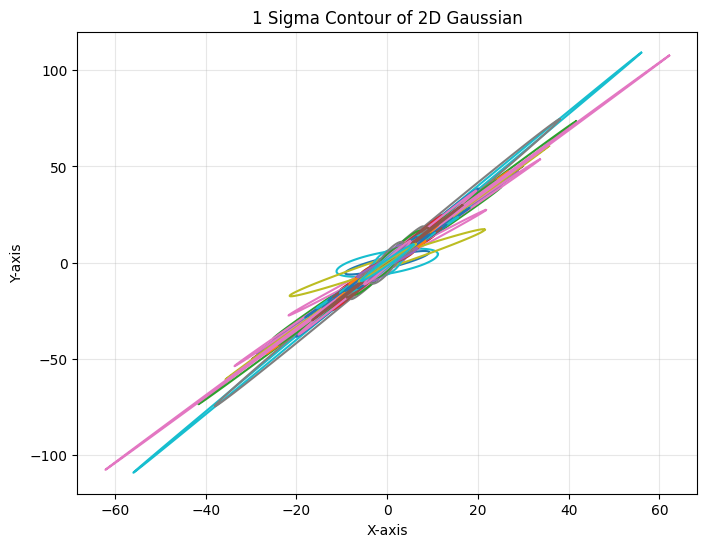

In [181]:
def plot_2d_gaussian_1sigma(mean, cov):
    """
    2차원 정규분포의 1 시그마 영역을 선으로 시각화하는 함수.
    
    Parameters:
    - mean: 평균 벡터 (리스트 또는 1차원 배열)
    - cov: 공분산 행렬 (2x2 행렬)
    """
    cov = np.array(cov)  # 공분산 행렬을 numpy 배열로 변환
    
    # 1시그마 영역 계산
    theta = np.linspace(0, 2 * np.pi, 100)  # 각도
    circle = np.array([np.cos(theta), np.sin(theta)])  # 단위 원
    ellipse = np.linalg.cholesky(cov) @ circle  # 공분산 변환
    ellipse = ellipse.T + mean  # 평균 추가
    
    # 플롯
    plt.plot(ellipse[:, 0], ellipse[:, 1], label="1σ Contour")
    plt.scatter(mean[0], mean[1], color='red', label="Mean")
    plt.title("1 Sigma Contour of 2D Gaussian")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(alpha=0.3)

# 평균과 공분산 설정
mean = [0, 0]  # 평균
cov = [[2, 0.5], [0.5, 1]]  # 공분산 행렬
plt.figure(figsize=(8, 6))

# 함수 호출
for cov in Sigma[:1000]:
    plot_2d_gaussian_1sigma(mean, cov)
plt.show()

In [151]:
theta = np.pi / 3
a = 8
b = 3
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T


In [182]:
batch_decompose_covariances(np.array([covariance_matrix]))

,Covariance Index,Major Axis (a),Minor Axis (b),"Rotation (θ, rad)","Rotation (θ, deg)"
0,1,30.0,2.0,-1.047198,-60.0


15.531486006515177
0.8068983315408271
120.28962505107361


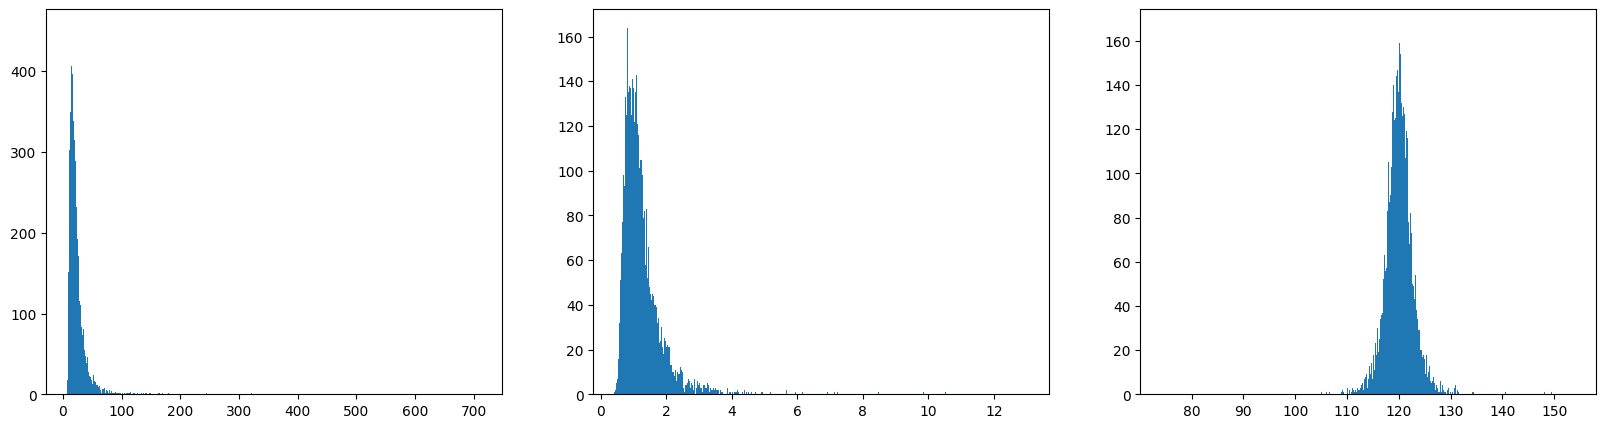

In [180]:
theta = np.pi / 3
a = 30
b = 2
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

nu = 4

dist = invwishart(df=nu, scale=covariance_matrix)
Sigma = dist.rvs(10000)
res = batch_decompose_covariances(Sigma)

fig, ax = plt.subplots(1,3, figsize=(20,5))


hist, bin_edges = np.histogram(res['Major Axis (a)'], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
hist, bin_edges = np.histogram(res['Minor Axis (b)'], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
hist, bin_edges = np.histogram([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
ax[0].hist(res['Major Axis (a)'], bins=1000)
ax[1].hist(res['Minor Axis (b)'], bins=1000)
ax[2].hist([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
plt.show()

90% 확률을 포함하는 (mu, Sigma):
mu: [0.26315789 0.26315789], Sigma:
[[0.64444444 0.22222222]
 [0.22222222 0.64444444]]
mu: [-0.26315789  0.26315789], Sigma:
[[ 0.64444444 -0.22222222]
 [-0.22222222  0.64444444]]
mu: [ 0.26315789 -0.26315789], Sigma:
[[ 0.64444444 -0.22222222]
 [-0.22222222  0.64444444]]
mu: [-0.26315789 -0.26315789], Sigma:
[[0.64444444 0.22222222]
 [0.22222222 0.64444444]]
mu: [0.26315789 0.26315789], Sigma:
[[ 0.64444444 -0.22222222]
 [-0.22222222  0.64444444]]
mu: [-0.26315789  0.26315789], Sigma:
[[0.64444444 0.22222222]
 [0.22222222 0.64444444]]
mu: [ 0.26315789 -0.26315789], Sigma:
[[0.64444444 0.22222222]
 [0.22222222 0.64444444]]
mu: [-0.26315789 -0.26315789], Sigma:
[[ 0.64444444 -0.22222222]
 [-0.22222222  0.64444444]]
mu: [0.26315789 0.78947368], Sigma:
[[0.1        0.22222222]
 [0.22222222 1.18888889]]
mu: [0.78947368 0.26315789], Sigma:
[[1.18888889 0.22222222]
 [0.22222222 0.1       ]]
mu: [ 0.26315789 -0.78947368], Sigma:
[[ 0.1        -0.22222222]
 [-0.222222

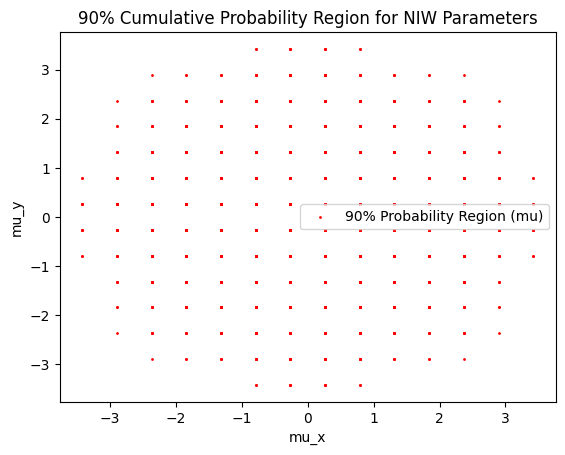

In [188]:
import numpy as np
from scipy.stats import invwishart, multivariate_normal

# NIW 파라미터 설정
mu_0 = np.array([0, 0])   # Prior mean
kappa_0 = 1               # Scale parameter
nu_0 = 5                  # Degrees of freedom (must be > dimension)
Psi_0 = np.eye(2)         # Scale matrix

# Grid 설정
mu_x = np.linspace(-5, 5, 20)
mu_y = np.linspace(-5, 5, 20)
sigma_11 = np.linspace(0.1, 5, 10)
sigma_22 = np.linspace(0.1, 5, 10)
sigma_12 = np.linspace(-2, 2, 10)

# Grid 생성
mu_grid = np.array(np.meshgrid(mu_x, mu_y)).T.reshape(-1, 2)
sigma_grid = np.array(np.meshgrid(sigma_11, sigma_22, sigma_12)).T.reshape(-1, 3)

# 유효한 공분산 행렬 필터링
valid_indices = sigma_grid[:, 0] * sigma_grid[:, 1] - sigma_grid[:, 2] ** 2 > 0
valid_sigma_grid = sigma_grid[valid_indices]

# 결합 확률 밀도 계산
densities = []

for mu in mu_grid:
    for sigma_params in valid_sigma_grid:
        sigma = np.array([
            [sigma_params[0], sigma_params[2]],
            [sigma_params[2], sigma_params[1]]
        ])
        # Inverse-Wishart 밀도 계산
        iw_density = invwishart.pdf(sigma, df=nu_0, scale=Psi_0)
        # 다변량 정규분포 밀도 계산
        mvn_density = multivariate_normal.pdf(mu, mean=mu_0, cov=sigma / kappa_0)
        # 결합 확률 밀도
        densities.append(iw_density * mvn_density)

# 확률 밀도 배열로 변환 및 정규화
densities = np.array(densities)
densities /= densities.sum()

# 누적 확률 계산
sorted_indices = np.argsort(-densities)
sorted_densities = densities[sorted_indices]
cumulative_prob = np.cumsum(sorted_densities)

# 90% 확률 영역 선택
threshold_index = np.searchsorted(cumulative_prob, 0.9)
selected_indices = sorted_indices[:threshold_index]

# 결과 정리
mu_selected = mu_grid[selected_indices // len(valid_sigma_grid)]
sigma_selected = valid_sigma_grid[selected_indices % len(valid_sigma_grid)]

# 출력
print(f"90% 확률을 포함하는 (mu, Sigma):")
for mu, sigma_params in zip(mu_selected, sigma_selected):
    sigma_matrix = np.array([
        [sigma_params[0], sigma_params[2]],
        [sigma_params[2], sigma_params[1]]
    ])
    print(f"mu: {mu}, Sigma:\n{sigma_matrix}")

# 시각화
import matplotlib.pyplot as plt

plt.scatter(mu_selected[:, 0], mu_selected[:, 1], color='red', s=1, label="90% Probability Region (mu)")
plt.title("90% Cumulative Probability Region for NIW Parameters")
plt.xlabel("mu_x")
plt.ylabel("mu_y")
plt.legend()
plt.show()


In [187]:
grid_points[10]

array([-3.98989899, -5.        ])